In [2]:
import pandas as pd 
import numpy as np 
import random as rd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [3]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#filtering data to make the algorithm run 
data = data.fillna(0) #filling in 0 in place of NaN values 
data = data.drop('Date' , axis = 1) 
data = data.drop('Location' , axis = 1)
data['RainToday'] = data['RainToday'].replace({'Yes':1, 'No':0})
data['RainTomorrow'] = data['RainTomorrow'].replace({'Yes' : 1, 'No':0})
data = data.drop('WindGustDir' , axis = 1)
data = data.drop('WindDir9am' , axis = 1)
data = data.drop('WindDir3pm' , axis = 1)

In [5]:
#scaling 
data = ((data - data.min())/(data.max() - data.min())) * 9 + 1
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,5.366177,5.733088,1.055989,1.192897,3.456112,3.480702,1.960427,2.889979,7.086166,5.494798,8.886922,8.881200,3.738677,3.669559,5.553969,5.585579,2.972501,2.972315
std,1.376043,1.260308,0.203525,0.258397,2.905315,1.109951,0.622635,0.943345,1.888908,2.010092,2.681423,2.675798,3.132539,3.048519,1.274512,1.318974,3.723150,3.723024
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.396226,4.844991,1.000000,1.000000,1.000000,3.000000,1.484615,2.137931,6.040000,4.150000,9.739769,9.729896,1.000000,1.000000,4.664557,4.731286,1.000000,1.000000
50%,5.330189,5.644612,1.000000,1.099310,1.062069,3.466667,1.900000,2.758621,7.210000,5.590000,9.789049,9.780108,2.000000,2.000000,5.518987,5.543186,1.000000,1.000000
75%,6.370283,6.614367,1.014555,1.322759,6.400000,4.066667,2.315385,3.482759,8.470000,6.850000,9.834006,9.825125,7.000000,7.000000,6.449367,6.458733,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,5.648585,5.712665,1.014555,1.0,1.0,3.933333,2.384615,3.482759,7.39,2.98,9.712104,9.718642,9.0,1.0,5.575949,5.698656,1.0,1.0
1,4.375000,6.086957,1.000000,1.0,1.0,3.933333,1.276923,3.275862,4.96,3.25,9.737176,9.724702,1.0,1.0,5.632911,6.130518,1.0,1.0
2,5.542453,6.189036,1.000000,1.0,1.0,4.066667,2.315385,3.689655,4.42,3.70,9.711239,9.732493,1.0,3.0,6.354430,5.940499,1.0,1.0
3,4.757075,6.580340,1.000000,1.0,1.0,2.600000,1.761538,1.931034,5.05,2.44,9.797695,9.767988,1.0,1.0,5.803797,6.510557,1.0,1.0
4,6.518868,7.311909,1.024259,1.0,1.0,3.733333,1.484615,3.068966,8.38,3.97,9.738905,9.709119,8.0,9.0,5.746835,7.063340,1.0,1.0


In [7]:
def random_centroids(data , k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids , axis = 1)

In [8]:
centroids = random_centroids(data , 5)
centroids

/var/folders/jg/7wc4_2rd4y78r0t099t0594c0000gn/T/ipykernel_5643/4208374444.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
MinTemp,5.308962,5.033019,4.672170,6.306604,5.351415
MaxTemp,5.202268,5.508507,5.491493,7.737240,5.882798
Rainfall,1.000000,1.189218,1.000000,1.000000,1.009704
Evaporation,1.000000,1.000000,1.086897,1.707586,1.124138
Sunshine,6.400000,1.000000,1.000000,1.000000,4.413793
WindGustSpeed,3.933333,4.066667,4.600000,2.600000,2.333333
WindSpeed9am,1.900000,1.900000,2.176923,1.138462,1.623077
WindSpeed3pm,3.068966,2.551724,2.551724,2.965517,1.620690
Humidity9am,9.100000,8.020000,5.680000,5.500000,7.480000
Humidity3pm,5.860000,6.040000,5.770000,4.330000,7.030000


In [9]:
def get_labels(data , centroids):
    distances = centroids.apply(lambda x : np.sqrt(((data - x) ** 2).sum(axis = 1))) # x is each column
    return distances.idxmin(axis = 1) # determines wqhich point is closest to which cluster

In [10]:
labels = get_labels(data , centroids)
labels.value_counts()

3    44458
4    36948
2    33182
0    28349
1     2523
Name: count, dtype: int64

In [11]:
def new_centroids(data , labels, k):
    return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T # each colum is a centroid and each row is a feature

In [12]:
def plot_clusters(data , labels , centroids , iteration):
    pca = PCA(n_components = 2 )
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T) # expected features to be columns and data points to be rows
    clear_output(wait = True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y = data_2d[:,1], c = labels)
    plt.scatter(x=centroids_2d[:,0], y = centroids_2d[:,1])
    plt.show()

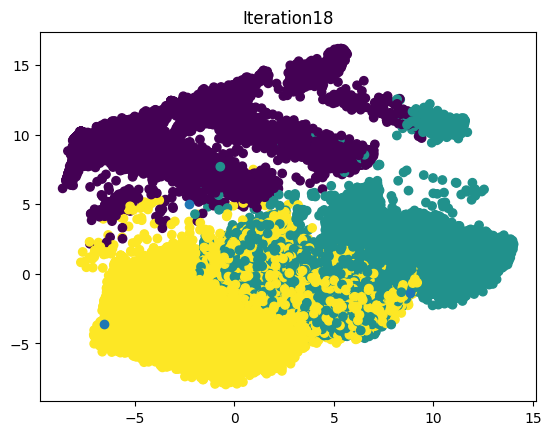

In [13]:
max_iterations = 100
k = 3
centroids = random_centroids(data , k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids 

    labels = get_labels(data , centroids)
    centroids = new_centroids(data , labels , k)
    plot_clusters(data , labels , centroids , iteration)
    iteration += 1